<a href="https://colab.research.google.com/github/Farmhouse121/Financial-Data-Science-in-Python/blob/main/Miscellaneous/Normality%20Tests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from my_library import *

19:04:35 Starting...
19:04:35 Installing yfinance into Google notebook...
19:04:40 Installing arch into Google notebook...
19:04:48 Initialized.


In [17]:
from scipy.stats import norm,gennorm,normaltest as normal_test
from itertools import product

results=pd.DataFrame()
results.index=pd.MultiIndex.from_tuples(list(product(list(range(10,1001,1)),list(np.arange(half,four,0.1)))))
results.index.names=["Sample","Beta"]
portfolio_size=10

for n,beta in tqdm(results.index):
    sample=pd.Series(np.apply_along_axis(lambda x:x.mean(),axis=0,arr=np.array([gennorm(beta,zero,one).rvs(portfolio_size) for _ in range(n)])))
    results.loc[(n,beta),"Mean"]=sample.mean()
    results.loc[(n,beta),"St.Dev."]=sample.var()
    results.loc[(n,beta),"Skewness"]=sample.skew()
    results.loc[(n,beta),"Kurtosis"]=sample.kurt()+three
    results.loc[(n,beta),"Normal Test"]=normal_test((sample-sample.mean())/sample.std())[1]

for alpha in 0.05,0.01,0.001:
    results["NT %g" % (alpha*hundred)]=results["Normal Test"]<alpha

display(results)

  0%|          | 0/34685 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


KeyboardInterrupt: 

20:01:58 Displaying F.P.R. with Gaussian Filter sigma=0.


TypeError: Dimensions of C (35, 238) should be one smaller than X(991) and Y(35) while using shading='flat' see help(pcolormesh)

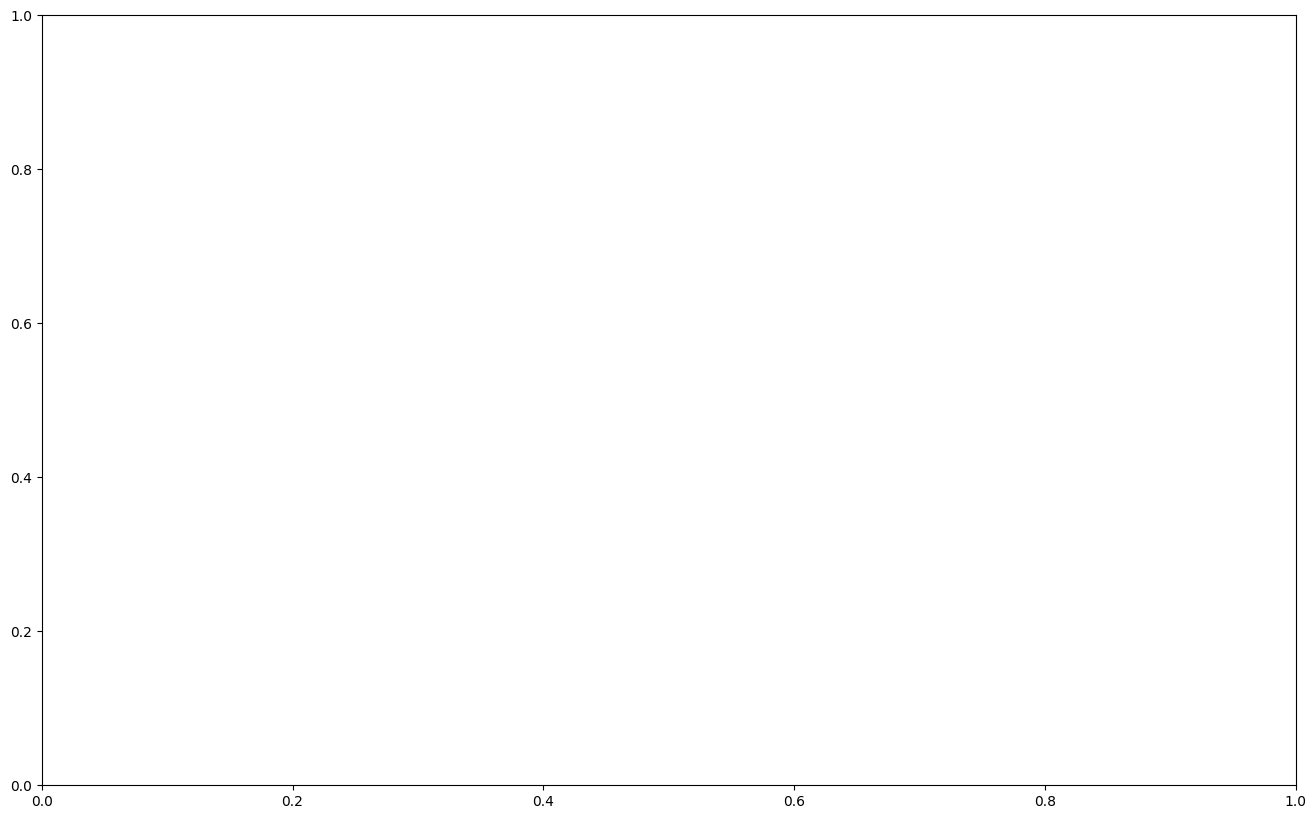

In [18]:
from scipy.ndimage import gaussian_filter
nprint("Displaying F.P.R. with Gaussian Filter sigma=%g." % (sigma:=zero))

Z=(df:=results.reset_index()).pivot_table(index="Beta",columns="Sample",values="Normal Test").values
X,Y=np.meshgrid(np.sort(df["Sample"].unique()),np.sort(df["Beta"].unique()))

figure,plot=pl.subplots(figsize=(ten*GoldenRatio,ten))
mesh=plot.pcolormesh(X,Y,gaussian_filter(Z,sigma) if sigma else Z,cmap='spring')
plot.set_xscale('log')
plot.xaxis.set_major_formatter(CountLabels(0))
plot.set_xlabel("Sample Sample, $N$",fontsize=12)
plot.set_ylabel("Skewness Parameter, $\\beta$",fontsize=12)
figure.suptitle(title:="Sample Size for Asymptotic Normality of a Portfolio of %d Assets\nwith Returns Drawn from the Generalized Normal Distribution" % portfolio_sizeexit,fontsize=22)

for y,t in (two,"Normal"),(one,"Laplace"):
    plot.axhline(y,color=(c:='black'),linestyle=':')
    plot.text(X.min(),y+0.01,t,color=c,ha='left',va='bottom')

for x,t in (30,'High-School "Large" Sample'),(252,'One Year'):
    plot.axvline(x,color=c,linestyle=':')
    plot.text(x*1.02,y+0.01,t,color=c,ha='left',va='bottom')

figure.colorbar(mesh,ax=plot,label='Jarque-Bera Test $p$ Value')
figure.savefig(title.split("\n")[0]+".png",dpi=300,bbox_inches='tight')

array([-0.04276756, -0.08183127, -0.13232864,  0.17173584, -0.06883132,
        0.19521831, -0.03609923,  0.15050529, -0.25642359,  0.2660856 ])